In [1]:
# import commands

import pandas as pd
import numpy as np
from scripts import project_functions_gc as pfg
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

%matplotlib inline

#### Seaborn figure theme

In [2]:
sns.set_theme(style="darkgrid",
              font_scale=1.3,
              palette='Pastel2'
             )
plt.rc('axes.spines', top=False, right=False)

# Exploratory Data Analysis

#### Research questions
- Does providing more mental health resources improve employees' mental health in the tech industry?
- Is there a relationship between employees' mental health and their knowledge of the mental health resources available?

#### Variables in this dataset
- **family_history:** Do you have a family history of mental illness?
- **treatment:** Have you sought treatment for a mental health condition?
- **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **benefits:** Does your employer provide mental health benefits?
- **care_options:** Do you know the options for mental health care your employer provides?
- **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
- **condition:** Whether respondents have a mental health condition or not, based on their response to **work_interfere**

## Data loading and processing

In [3]:
mh0 = pfg.load_and_process('../../data/raw/mentalhealthintech.csv')
mh0

,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,condition,resources
0,Yes,Yes,Sometimes,1,1,2,2,Yes,Poor
1,No,Yes,Often,1,1,2,2,Yes,Poor
2,Yes,Yes,Rarely,1,0,0,1,Yes,Good
3,No,No,N/A,0,0,2,0,No,Poor
4,Yes,Yes,Rarely,1,1,0,0,Yes,Poor
...,...,...,...,...,...,...,...,...,...
878,Yes,Yes,Sometimes,1,1,1,2,Yes,Good
879,No,Yes,N/A,2,2,2,2,No,Poor
880,Yes,Yes,Often,1,1,2,2,Yes,Poor
881,Yes,Yes,Sometimes,1,1,2,2,Yes,Poor


In [4]:
# this filtered version of the dataset only contains respondents who indicated they have a mental health condition
mh_filtered_condition = mh0[mh0['work_interfere'].str.contains('N/A') == False].reset_index().drop('index', axis=1)
mh_filtered_condition

,family_history,treatment,work_interfere,benefits,care_options,wellness_program,seek_help,condition,resources
0,Yes,Yes,Sometimes,1,1,2,2,Yes,Poor
1,No,Yes,Often,1,1,2,2,Yes,Poor
2,Yes,Yes,Rarely,1,0,0,1,Yes,Good
3,Yes,Yes,Rarely,1,1,0,0,Yes,Poor
4,No,Yes,Sometimes,0,0,2,0,Yes,Poor
...,...,...,...,...,...,...,...,...,...
682,Yes,Yes,Sometimes,1,2,2,0,Yes,Poor
683,Yes,Yes,Sometimes,1,1,0,2,Yes,Poor
684,Yes,Yes,Sometimes,1,1,1,2,Yes,Good
685,Yes,Yes,Often,1,1,2,2,Yes,Poor


## Overview of data

In [5]:
print(f'{mh0.shape[0]} rows, {mh0.shape[1]} columns')

883 rows, 9 columns


In [6]:
mh0.dtypes

family_history      object
treatment           object
work_interfere      object
benefits             int64
care_options         int64
wellness_program     int64
seek_help            int64
condition           object
resources           object
dtype: object

In [7]:
mh0.describe(include=['object'])

,family_history,treatment,work_interfere,condition,resources
count,883,883,883,883,883
unique,2,2,5,2,2
top,No,No,Sometimes,Yes,Poor
freq,551,447,328,687,704


## Pandas profiling

In [8]:
# ProfileReport(mh0).to_notebook_iframe()

**Pandas profiling observations and notes**
- Ignored the duplicate row warning because it doesn't seem like a big problem in the context of this dataset
- More people have sought treatment for mental health issues than people who haven't sought treatment.
- A reasonable number of employees seem to have knowledge about available mental health resources.

In [9]:
# sorted labels and dictionnaries
sorted_response_labels = ['Not sure', 'Yes', 'No']
sorted_freq_labels = ['Never', 'Rarely', 'Sometimes', 'Often']
sorted_yn_dict = {0:"Don't know", 1:'Yes', 2:'No'}

In [10]:
class display(object):
    # taken from class notes
    
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## "Measures" of mental health

In [11]:
# getting counts and relative frequencies
mh_condition = pfg.count_rel_freq_df(mh0, 'condition')

treatment = pfg.count_rel_freq_df(mh0,'treatment')

fam_hist = pfg.count_rel_freq_df(mh0,'family_history')

In [12]:
display('treatment', 'fam_hist', 'mh_condition')

,treatment,count,rel_freq
0,No,447,50.62
1,Yes,436,49.38
,family_history,count,rel_freq
0,No,551,62.4
1,Yes,332,37.6
,condition,count,rel_freq
0,Yes,687,77.8
1,No,196,22.2


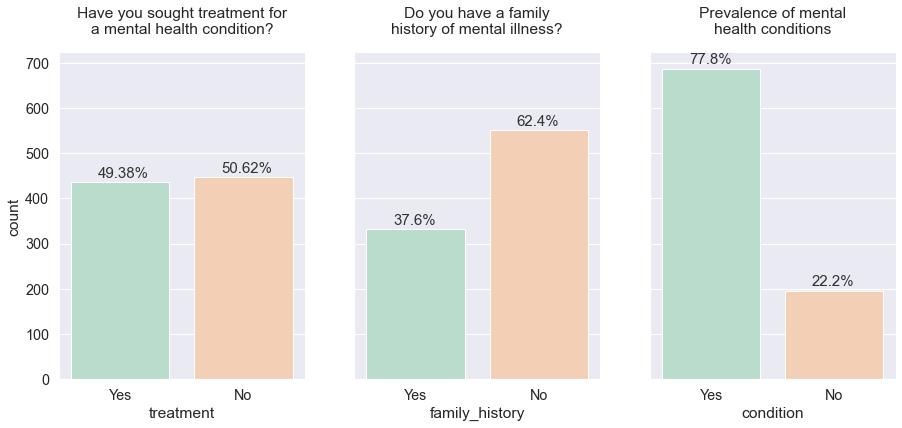

In [14]:
# references: https://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
            # https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
            # https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

fig, axes = plt.subplots(1,3, figsize=(15,6),sharey=True)

# plot 1: treatment
ax0 = sns.barplot(ax=axes[0], data=treatment, x='treatment', y='count', order=['Yes', 'No'])
pfg.rel_freq_label(ax0,0.22,10)
ax0.set_title('Have you sought treatment for\na mental health condition?', y=1.04)

# plot 2: family history
ax1 = sns.barplot(ax=axes[1], data=fam_hist, x='family_history', y='count', order=['Yes', 'No'])
pfg.rel_freq_label(ax1,0.22,10)
ax1.set_title('Do you have a family\nhistory of mental illness?', y=1.04)

# plot 3: whether they have a mental health condition or not
ax2 = sns.barplot(ax=axes[2], data=mh_condition, x='condition', y='count')
pfg.rel_freq_label(ax2,0.22,10)
ax2.set_title('Prevalence of mental\nhealth conditions', y=1.04)

for ax in axes.flat:
    ax.label_outer()

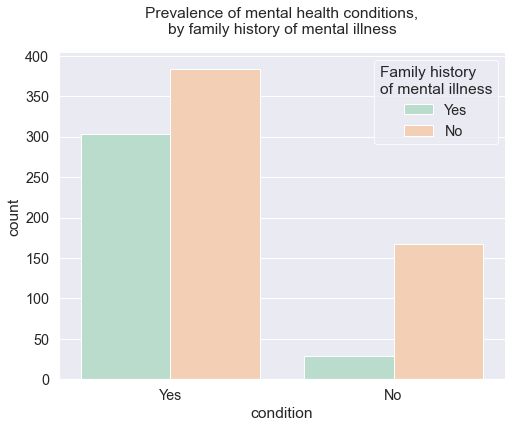

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
g = sns.countplot(data=mh0, x='condition', hue='family_history')

plt.title('Prevalence of mental health conditions,\nby family history of mental illness', y=1.04)
plt.legend(title='Family history\nof mental illness', edgecolor='1')

- Number of people who have or have not sought treatment for mental health is split roughly into half, but this does include people without a mental health condition.
- A significant number of respondents indicated having a mental health condition (77.8%).
- Even though almost half of respondents have sought treatment for a mental health condition, only a third of respondents have a family history of mental illness.
    - Of those who indicated a mental health condition, the number of those who have a family history of mental illness is less than those without a family history. This was surprising because mental health conditions are often inheritable.
    - Nonetheless, I don't see anything unusual with this; family history is not a necessary precondition for having mental health issues.

## Seeking treatment

**condition + treatment**

In [16]:
# reference: https://www.codeforests.com/2020/07/18/calculate-percentage-within-group/
cond_treatmt_grp = (mh0.groupby(['condition', 'treatment'])
                           .count()
                           .loc[:, ['family_history']]
                           .rename(columns={'family_history':'count'})
                          )

pfg.rel_freq_within_grp(cond_treatmt_grp)
pfg.make_relfreq_col(cond_treatmt_grp)

cond_treatmt_idx = cond_treatmt_grp.reset_index() # created a version with index reset so it's easier to plot

display('cond_treatmt_grp', 'cond_treatmt_idx')

cond_treatmt_grp
                     count  withingrp_relfreq  rel_freq
condition treatment                                    
No        No           193              98.47     21.86
          Yes            3               1.53      0.34
Yes       No           254              36.97     28.77
          Yes          433              63.03     49.04

cond_treatmt_idx
  condition treatment  count  withingrp_relfreq  rel_freq
0        No        No    193              98.47     21.86
1        No       Yes      3               1.53      0.34
2       Yes        No    254              36.97     28.77
3       Yes       Yes    433              63.03     49.04

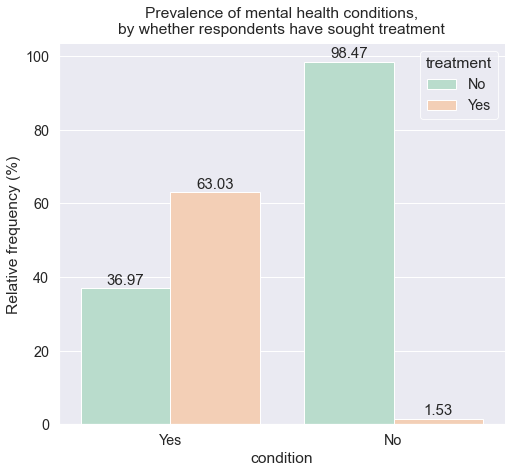

In [17]:
# reference: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

fig, ax = plt.subplots(figsize=(8,7))
g = sns.barplot(data=cond_treatmt_idx, x='condition', y='withingrp_relfreq', hue='treatment', order=('Yes', 'No'))

pfg.grouped_rel_freq_label(g)

plt.ylabel('Relative frequency (%)')
plt.title('Prevalence of mental health conditions,\nby whether respondents have sought treatment', y=1.01)
plt.legend(title='treatment', edgecolor='1')

- Out of the 687 people who indicated mental health issues, over half have sought treatment (63.03%).
- On the other hand, however, over a quarter of people with a mental health condition have not sought treatment (36.97%).
- Ignoring the "No" category because treatment status is not really significant in the context of that group of respondents. The difference between those who have/have not sought treatment in the group without a mental health condition is very large, so I am fairly certain there's not enough incorrect data (e.g., people indicate they don't have a mental health condition but say they have had treatment) to raise concerns.

**family_history + treatment**

In [18]:
hist_treatmt_grp = (mh0.groupby(['family_history', 'treatment'])
                            .count()
                            .loc[:, ['work_interfere']]
                            .rename(columns={'work_interfere':'count'})
                          )

pfg.rel_freq_within_grp(hist_treatmt_grp)
pfg.make_relfreq_col(hist_treatmt_grp)

hist_treatmt_idx = hist_treatmt_grp.reset_index() # created a version with index reset so it's easier to plot

display('hist_treatmt_grp', 'hist_treatmt_idx')

hist_treatmt_grp
                          count  withingrp_relfreq  rel_freq
family_history treatment                                    
No             No           364              66.06     41.22
               Yes          187              33.94     21.18
Yes            No            83              25.00      9.40
               Yes          249              75.00     28.20

hist_treatmt_idx
  family_history treatment  count  withingrp_relfreq  rel_freq
0             No        No    364              66.06     41.22
1             No       Yes    187              33.94     21.18
2            Yes        No     83              25.00      9.40
3            Yes       Yes    249              75.00     28.20

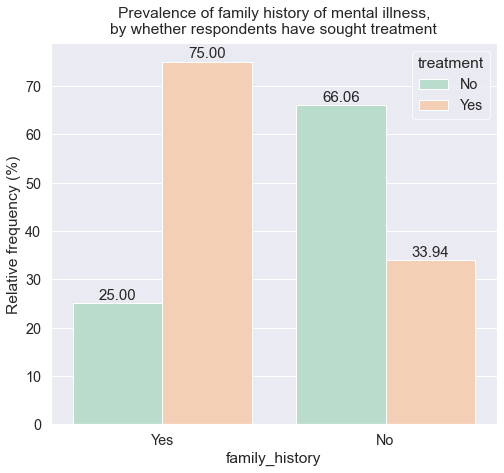

In [19]:
fig, ax = plt.subplots(figsize=(8,7))
g = sns.barplot(data=hist_treatmt_idx, x='family_history', y='withingrp_relfreq', hue='treatment', order=('Yes', 'No'))

pfg.grouped_rel_freq_label(g)

plt.ylabel('Relative frequency (%)')
plt.title('Prevalence of family history of mental illness,\nby whether respondents have sought treatment', y=1.01)
plt.legend(title='treatment', edgecolor='1')

- 75% of those with a family history of mental illness have sought treatment, more than those without a family history of mental illness.
- This might mean a number of things. For example, people with a family history of mental illness might not necessarily have mental health concerns themselves, which might be why they don't seek treatment. It's hard to judge the exact causes.

## Mental health interfering with work

In [20]:
# counts and relative frequencies

cond_interfere = pfg.count_rel_freq_df(mh_filtered_condition,'work_interfere') # this only includes people with a mental health condition

treatmt_interfere = mh_filtered_condition.groupby('treatment')['work_interfere'].value_counts().to_frame().rename(columns={'work_interfere':'count'})
pfg.rel_freq_within_grp(treatmt_interfere)
pfg.make_relfreq_col(treatmt_interfere)

treatmt_interfere_idx = treatmt_interfere.reset_index()

display('cond_interfere', 'treatmt_interfere', 'treatmt_interfere_idx')

cond_interfere
  work_interfere  count  rel_freq
0      Sometimes    328     47.74
1          Never    149     21.69
2         Rarely    124     18.05
3          Often     86     12.52

treatmt_interfere
                          count  withingrp_relfreq  rel_freq
treatment work_interfere                                    
No        Never             127              50.00     18.49
          Sometimes          76              29.92     11.06
          Rarely             36              14.17      5.24
          Often              15               5.91      2.18
Yes       Sometimes         252              58.20     36.68
          Rarely             88              20.32     12.81
          Often              71              16.40     10.33
          Never              22               5.08      3.20

treatmt_interfere_idx
  treatment work_interfere  count  withingrp_relfreq  rel_freq
0        No          Never    127              50.00     18.49
1        No      Sometimes     76              29.92     11.06
2        No         Rarely     36              14.17      5.24
3        No          Often     15               5.91      2.18
4       Yes      Sometimes    252              58.20     36.68
5       Yes         Rarely     88              20.32     12.81
6       Yes          Often     71              16.40     10.33
7       Yes          Never     22               5.08      3.20

Text(0.5, 1.08, "How often respondents' mental health\nconditions interfere with work")

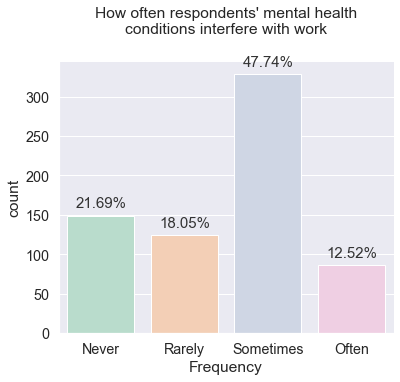

In [21]:
fig, ax = plt.subplots(figsize=(6,5))
g = sns.barplot(data=cond_interfere, x='work_interfere',y='count', order=sorted_freq_labels)

pfg.rel_freq_label(g,0.1,10)

plt.xlabel('Frequency', y=0.9)
g.set_title("How often respondents' mental health\nconditions interfere with work", y=1.08)

Text(0.27, 1.1, 'How often mental health conditions interfere with work,\nby whether respondents have sought treatment')

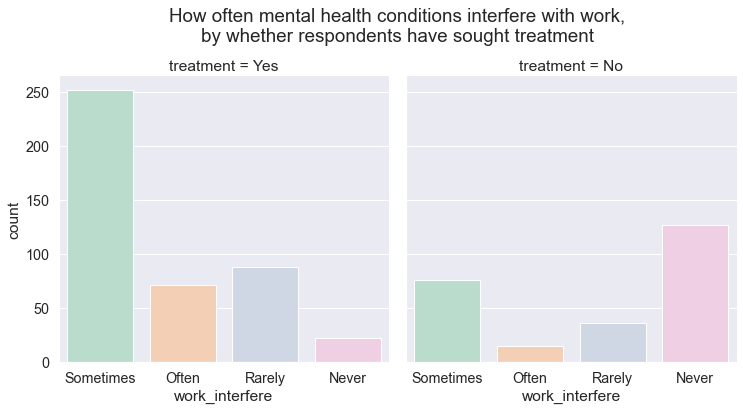

In [22]:
# reference: https://seaborn.pydata.org/generated/seaborn.catplot.html

g = sns.catplot(x="work_interfere", col="treatment", col_wrap=4,
                data=mh_filtered_condition,
                kind="count", height=5, aspect=1, row_order=sorted_freq_labels,
                )
g.fig.suptitle('How often mental health conditions interfere with work,\nby whether respondents have sought treatment', x=0.27, y=1.1)

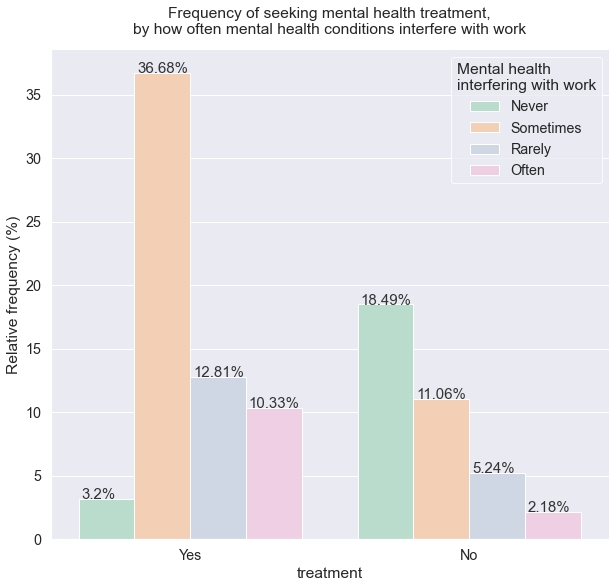

In [43]:
# another way to visualize work_interfere and treatment all at once

fig, ax = plt.subplots(figsize=(10,9))

g = sns.barplot(data=treatmt_interfere_idx, x='treatment', y='rel_freq', hue='work_interfere', order=['Yes', 'No'])

pfg.rel_freq_label(g,0.01,0)

plt.title('Frequency of seeking mental health treatment,\nby how often mental health conditions interfere with work',y=1.02)
plt.ylabel('Relative frequency (%)')
plt.legend(title='Mental health\ninterfering with work', edgecolor='1')

- Mental health interferes with work more often for people who have sought treatment for a mental health issue than for people who have not sought treatment for a mental health issue, which is interesting because these plots only include data from people who indicated they have a mental health condition.
    - For people who have *not* sought mental health treatment, despite indicating a mental health condition, most feel that their condition never interferes with work.
- For people with a mental health condition, almost half (47.74%) feel that it interferes with their work sometimes.
    - Interestingly, however, almost a quarter (21.69%) feel that their mental health condition never interfere with their work.
- Can't make robust statements about the causes, because there are multiple possible reasons. For example, treatment might have worked for a respondent, which leads them to answer with "Never."

# Focused analysis
### Knowledge and provision of mental health resources + relationships with actual mental health

**Research questions:**
- Is there a relationship between providing more mental health resources and quality of employees' mental health in the tech industry?
- Is there a relationship between employees' mental health and their knowledge of the mental health resources available?

**How mental health was assessed**

There was no question that directly asked about participants' mental health, so mental health was inferred based on whether participants judged the **work_interfere** question to be applicable to them. Data was grouped to give a count of those supposedly *with* a mental health condition (those who answered with anything but N/A) and those *without* a mental health condition (those who answered with N/A). This information is contained in the **condition** column, which tells us whether or not respondents might have a mental health condition.

The **work_interfere** variable can also be used as a rough proxy for the severity of mental health conditions among respondents. I say "rough" because the question ("If you have a mental health condition, do you feel that it interferes with your work?") only looks at the effects of mental health in the workplace, ignoring how it may manifest in other areas of one's life.

Additionally, the **treatment** variable can also tell us a little bit about the state of mental health among respondents, although it's necessary to point out that not everyone who faces mental health issues will seek out treatment for said issues. Thus, this variable is also merely a rough proxy. It also seems more appropriate to deem it as an indication of resources available to respondents.

Upon further consideration, the **family_history** variable does not tell us much about the frequency of mental health concerns, so I have decided to not use that variable, relying on **condition**, **treatment**, and **work_interfere** instead.
<br><br>

**How knowledge of mental health resources was assessed**

**knowledge_counts** aggregates all the variables assessing both knowledge and provision of mental health resources (benefits, care_options, wellness_program, seek_help). I did this to look at the number of "Don't know" or "Not sure" responses compared to the number of "Yes" or "No," because this gives an idea of the state of knowledge of mental health resources.

**care_options** was used to assess knowledge of mental health resources between responses to other variables, such as whether respondents have a mental health condition (**condition**) and how often respondents with a mental health condition feel their condition interferes with work (**work_interfere**). This column was the only one that directly asked about participants' knowledge ("Do you know the options for mental health care your employer provides?").
<br><br>

**How provision of mental health resources was assessed**

In the **resources** column, if participants responded with "Yes" to 2 or more of the questions that asked about whether employers provide mental health resources (benefits, wellness_program, seek_help), provision of mental health resources is deemed "Good." If participants responded with "Yes" to less than 2 of these questions, provision is deemed "Poor."

"Resources" include providing mental health benefits (**benefits**), communication about mental health (**wellness_program**), and resources on whether to seek further information and help (**seek_help**).

---

#### Knowledge of mental health resources

In [24]:
# reference: https://stackoverflow.com/questions/51211538/pandas-seaborn-countplot-from-several-columns

knowledge = mh0[['benefits', 'care_options', 'wellness_program', 'seek_help']].melt().replace({2:'No', 1:'Yes', 0:"Don't know"})
knowledge_counts = pfg.count_rel_freq_df(knowledge, 'value').replace({2:'No', 1:'Yes', 0:"Don't know"})

display('knowledge', 'knowledge_counts')

,variable,value
0,benefits,Yes
1,benefits,Yes
2,benefits,Yes
3,benefits,Don't know
4,benefits,Yes
...,...,...
3527,seek_help,No
3528,seek_help,No
3529,seek_help,No
3530,seek_help,No


Text(0.5, 1.02, 'Knowledge of mental health resources')

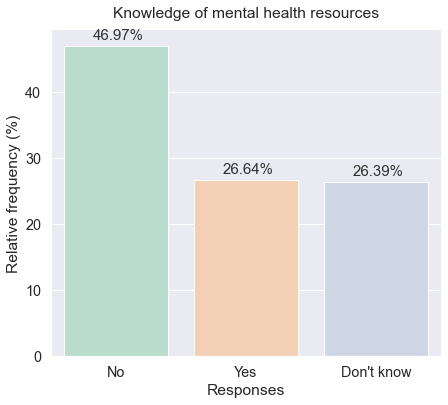

In [25]:
fig, ax = plt.subplots(figsize=(7,6))

ax0 = sns.barplot(data=knowledge_counts, x='value', y='rel_freq')
pfg.rel_freq_label(ax0, 0.22,1)
ax0.set_ylabel('Relative frequency (%)')
ax0.set_xlabel('Responses')
ax0.set_title('Knowledge of mental health resources', y=1.02)

In [26]:
interfere_knowledge = mh_filtered_condition.groupby('care_options')['work_interfere'].value_counts().to_frame().rename(columns={'work_interfere':'count'})
pfg.rel_freq_within_grp(interfere_knowledge)
pfg.make_relfreq_col(interfere_knowledge)

interfere_knowledge_index = interfere_knowledge.reset_index()

display('interfere_knowledge', 'interfere_knowledge_index')

interfere_knowledge
                             count  withingrp_relfreq  rel_freq
care_options work_interfere                                    
0            Sometimes          71              43.03     10.33
             Never              49              29.70      7.13
             Rarely             26              15.76      3.78
             Often              19              11.52      2.77
1            Sometimes         133              50.38     19.36
             Rarely             58              21.97      8.44
             Never              38              14.39      5.53
             Often              35              13.26      5.09
2            Sometimes         124              48.06     18.05
             Never              62              24.03      9.02
             Rarely             40              15.50      5.82
             Often              32              12.40      4.66

interfere_knowledge_index
    care_options work_interfere  count  withingrp_relfreq  rel_freq
0              0      Sometimes     71              43.03     10.33
1              0          Never     49              29.70      7.13
2              0         Rarely     26              15.76      3.78
3              0          Often     19              11.52      2.77
4              1      Sometimes    133              50.38     19.36
5              1         Rarely     58              21.97      8.44
6              1          Never     38              14.39      5.53
7              1          Often     35              13.26      5.09
8              2      Sometimes    124              48.06     18.05
9              2          Never     62              24.03      9.02
10             2         Rarely     40              15.50      5.82
11             2          Often     32              12.40      4.66

Text(0.5, 1.02, 'Knowledge of care options, by frequency of mental health interfering with work')

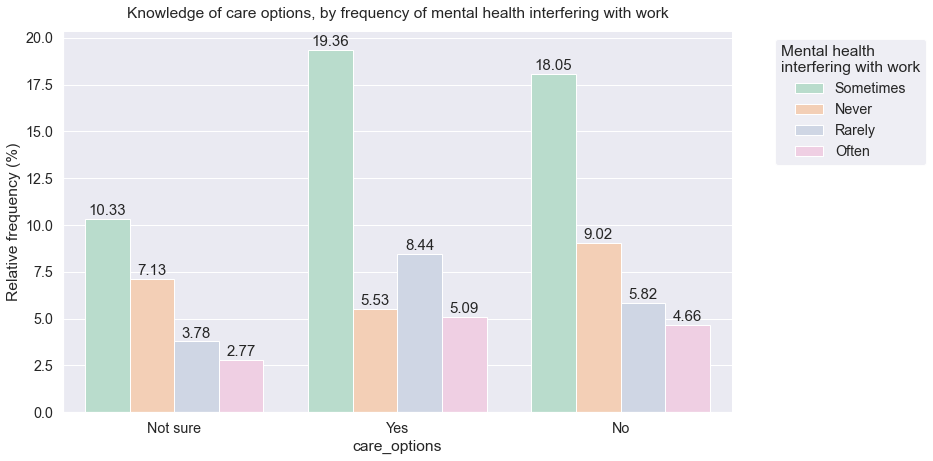

In [27]:
fig, ax = plt.subplots(figsize=(12,7))

ax = sns.barplot(data=interfere_knowledge_index, y='rel_freq', x='care_options', hue='work_interfere')

pfg.grouped_rel_freq_label(ax)

ax.set_xticklabels(sorted_response_labels)
plt.legend(title='Mental health\ninterfering with work',bbox_to_anchor=(1.3,1),edgecolor='1')
plt.ylabel('Relative frequency (%)')
plt.title('Knowledge of care options, by frequency of mental health interfering with work', y=1.02)

-

---

#### Employers' provision of resources for mental health

Text(0.5, 1.02, 'Responses to different variables assessing mental health resources')

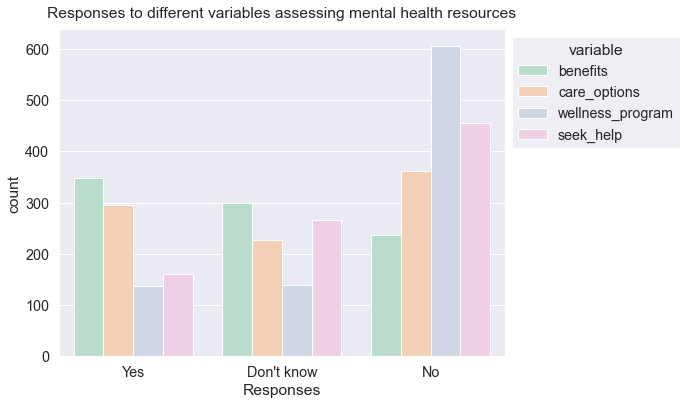

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

g = sns.countplot(data=knowledge, x='value', hue='variable')
g.legend(title='variable', bbox_to_anchor=(1,1), edgecolor='1')
g.set_xlabel('Responses')
g.set_title('Responses to different variables assessing mental health resources', y=1.02)

In [29]:
resources_general = mh0[['benefits', 'wellness_program', 'seek_help']].melt().replace(sorted_yn_dict)

resources_gen_counts = (mh0[['benefits','wellness_program', 'seek_help']].melt()
                      .loc[:,['value']]
                      .value_counts()
                      .to_frame()
                      .reset_index()
                      .rename(columns={0:'count'})
                      .replace({2:'No', 1:'Yes', 0:"Don't know"})
                     )
pfg.make_relfreq_col(resources_gen_counts)

resources_count = pfg.count_rel_freq_df(mh0, 'resources')

display('resources_general','resources_gen_counts', 'resources_count')

,variable,value
0,benefits,Yes
1,benefits,Yes
2,benefits,Yes
3,benefits,Don't know
4,benefits,Yes
...,...,...
2644,seek_help,No
2645,seek_help,No
2646,seek_help,No
2647,seek_help,No


Text(0.5, 1.05, 'Frequency of mental health resources provided')

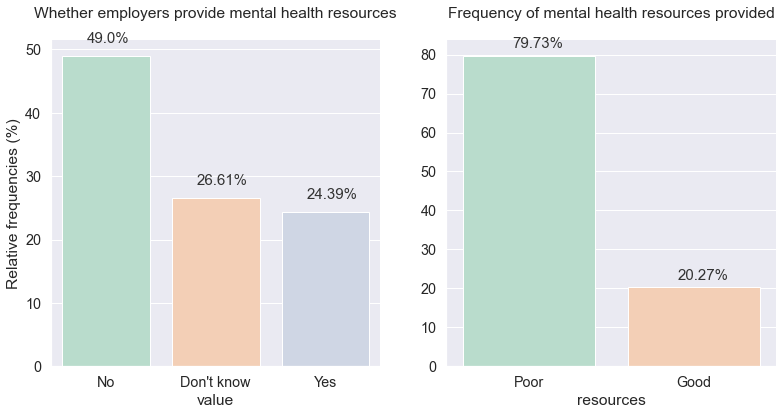

In [30]:
fig, axes = plt.subplots(1,2,figsize=(13,6))

# plot 1
ax0 = sns.barplot(ax=axes[0],data=resources_gen_counts, x='value', y='rel_freq')
pfg.rel_freq_label(ax0,0.23,2)
ax0.set_ylabel('Relative frequencies (%)')
ax0.set_title('Whether employers provide mental health resources',y=1.05)
plt.xlabel('Responses')


# plot 2
ax1 = sns.barplot(ax=axes[1],data=resources_count, x='resources', y='rel_freq')
pfg.rel_freq_label(ax1,0.3,2)
ax1.set_ylabel('')
ax1.set_title('Frequency of mental health resources provided', y=1.05)

- The number of "No" responses to questions that asked about the existence of mental health resources is almost half of all possible responses.
- Looking at the frequency of mental health resources provided, an overwhelming proportion (79.73%) of responses indicated a poor amount of mental health resources provided by employers. 

[Text(0, 0, 'Not sure'), Text(1, 0, 'Yes'), Text(2, 0, 'No')]

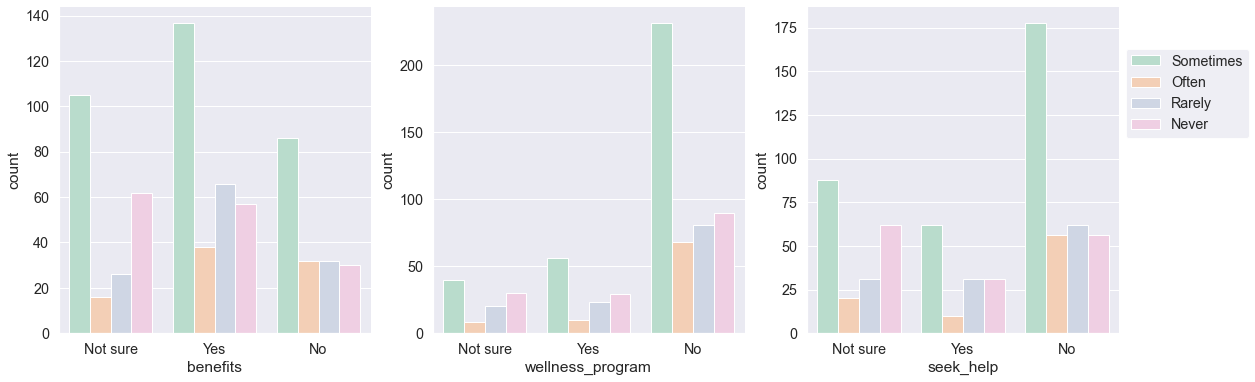

In [31]:
# reference: https://stackoverflow.com/questions/12402561/how-to-set-font-size-of-matplotlib-axis-legend

fig, axes = plt.subplots(1,3, sharex=True, figsize=(19,6))

# plot 1: benefits
ax0 = sns.countplot(ax=axes[0], data=mh_filtered_condition, x='benefits', hue='work_interfere')
ax0.get_legend().remove()

# plot 2: wellness program
ax1 = sns.countplot(ax=axes[1], data=mh_filtered_condition, x='wellness_program', hue='work_interfere')
ax1.get_legend().remove()

# plot 3: resources for information and seeking help
ax2 = sns.countplot(ax=axes[2], data=mh_filtered_condition, x='seek_help', hue='work_interfere')
ax2.get_legend().remove()

handles, labels = ax0.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1,0.8),edgecolor='1')

axes[0].set_xticklabels(sorted_response_labels)

- Very few employers have ever discussed mental health as part of an employee wellness program.
- Not a lot of employers provide resources to learn more about mental health issues and seeking help.
- There seems to be a lot of uncertainty/lack of knowledge about mental health resources provided by employers.
- Out of the variables assessing knowledge and provision of mental health resources, participants stated that employers provide mental health benefits the most.
    - Additionally, the least provided "resource" is discussion of mental health as part of a wellness program.

In [32]:
interfere_resources = mh_filtered_condition.groupby('resources')['work_interfere'].value_counts().to_frame().rename(columns={'work_interfere':'count'})
pfg.rel_freq_within_grp(interfere_resources)
pfg.make_relfreq_col(interfere_resources)

interfere_resources_index = interfere_resources.reset_index()

display('interfere_resources','interfere_resources_index')

interfere_resources
                          count  withingrp_relfreq  rel_freq
resources work_interfere                                    
Good      Sometimes          70              46.05     10.19
          Never              39              25.66      5.68
          Rarely             33              21.71      4.80
          Often              10               6.58      1.46
Poor      Sometimes         258              48.22     37.55
          Never             110              20.56     16.01
          Rarely             91              17.01     13.25
          Often              76              14.21     11.06

interfere_resources_index
  resources work_interfere  count  withingrp_relfreq  rel_freq
0      Good      Sometimes     70              46.05     10.19
1      Good          Never     39              25.66      5.68
2      Good         Rarely     33              21.71      4.80
3      Good          Often     10               6.58      1.46
4      Poor      Sometimes    258              48.22     37.55
5      Poor          Never    110              20.56     16.01
6      Poor         Rarely     91              17.01     13.25
7      Poor          Often     76              14.21     11.06

Text(0.5, 1.02, 'Whether employers provide mental health resources,\nby frequency of mental health interfering with work')

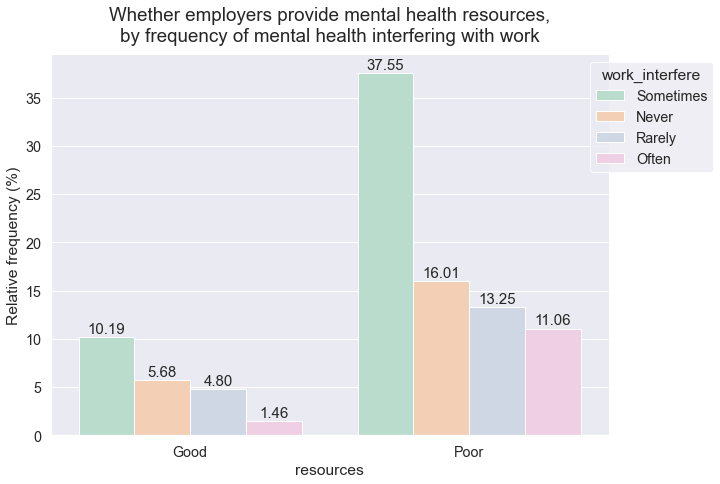

In [33]:
fig, ax = plt.subplots(figsize=(10,7))

g = sns.barplot(data=interfere_resources_index, y='rel_freq', x='resources', hue='work_interfere')

pfg.grouped_rel_freq_label(g)
    
plt.legend(title='work_interfere',bbox_to_anchor=(1.2,1), edgecolor='1')
g.set_ylabel('Relative frequency (%)')
g.set_title('Whether employers provide mental health resources,\nby frequency of mental health interfering with work', size='large', y=1.02)

# Discussion and Conclusions

- Knowledge of what mental health resources are available seems to contribute to the improvement of handling mental health issues. Thus, employers might need to be more intentional about informing employees about the resources available.